# **Importing Packages**

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Collecting the data**

In [18]:
df=pd.read_csv("Fertilizer Prediction.csv")
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


# **Pre Processing of data**

In [19]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [20]:
df["Fertilizer Name"].value_counts()

Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: Fertilizer Name, dtype: int64

In [21]:
df["Soil Type"].value_counts()

Loamy     21
Sandy     20
Clayey    20
Black     19
Red       19
Name: Soil Type, dtype: int64

In [22]:
df["Crop Type"].value_counts()

Sugarcane      13
Cotton         12
Millets        11
Paddy          10
Pulses         10
Wheat           9
Tobacco         7
Barley          7
Oil seeds       7
Ground Nuts     7
Maize           6
Name: Crop Type, dtype: int64

In [23]:
map1={label:idx for idx,label in enumerate(np.unique(df['Soil Type'].values))}

df["Soil Type"]=df["Soil Type"].map(map1)

In [24]:
df["Soil Type"].value_counts()

2    21
4    20
1    20
0    19
3    19
Name: Soil Type, dtype: int64

In [25]:
map2 = {label:idx for idx,label in enumerate(np.unique(df['Crop Type'].values))}

df["Crop Type"]=df["Crop Type"].map(map2)

In [26]:
df["Crop Type"].value_counts()

8     13
1     12
4     11
6     10
7     10
10     9
9      7
0      7
5      7
2      7
3      6
Name: Crop Type, dtype: int64

In [27]:
map3 = {label:idx for idx,label in enumerate(np.unique(df['Fertilizer Name'].values))}

df['Fertilizer Name']=df['Fertilizer Name'].map(map3)

In [28]:
df["Fertilizer Name"].value_counts()

6    22
5    18
4    17
1    14
3    14
2     7
0     7
Name: Fertilizer Name, dtype: int64

## **Categorical Data -> Numeric Data**

In [30]:
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6
...,...,...,...,...,...,...,...,...,...
94,25,50,32,1,7,24,0,19,4
95,30,60,27,3,9,4,17,17,0
96,38,72,51,2,10,39,0,0,6
97,36,60,43,4,4,15,0,41,5


# **Visualization of DataFrame**

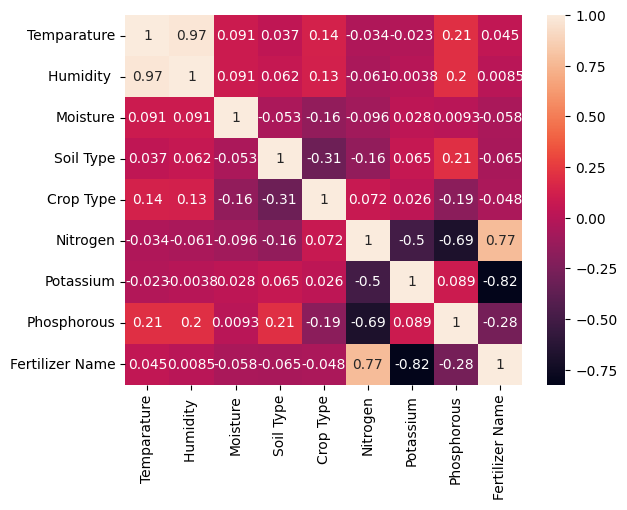

In [31]:
df.corr()
sns.heatmap(df.corr(),annot=True)
plt.show()

In [32]:
df.corr()["Fertilizer Name"]

Temparature        0.045079
Humidity           0.008468
Moisture          -0.058222
Soil Type         -0.065404
Crop Type         -0.047543
Nitrogen           0.774628
Potassium         -0.824218
Phosphorous       -0.280311
Fertilizer Name    1.000000
Name: Fertilizer Name, dtype: float64

### **Feature Selection based on Correlation values**

In [37]:
df.drop('Humidity ',axis=1,inplace=True)

In [38]:
df

,Temparature,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,38,4,3,37,0,0,6
1,29,45,2,8,12,0,36,5
2,34,62,0,1,7,9,30,1
3,32,34,3,9,22,0,20,4
4,28,46,1,6,35,0,0,6
...,...,...,...,...,...,...,...,...
94,25,32,1,7,24,0,19,4
95,30,27,3,9,4,17,17,0
96,38,51,2,10,39,0,0,6
97,36,43,4,4,15,0,41,5


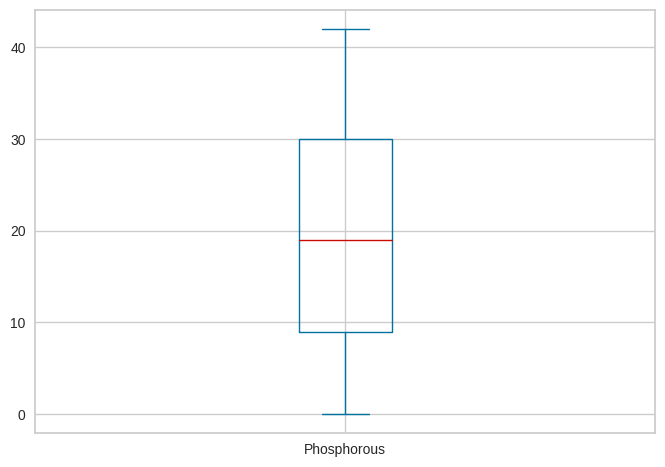

In [39]:
df['Phosphorous'].plot(kind="box")
plt.show()

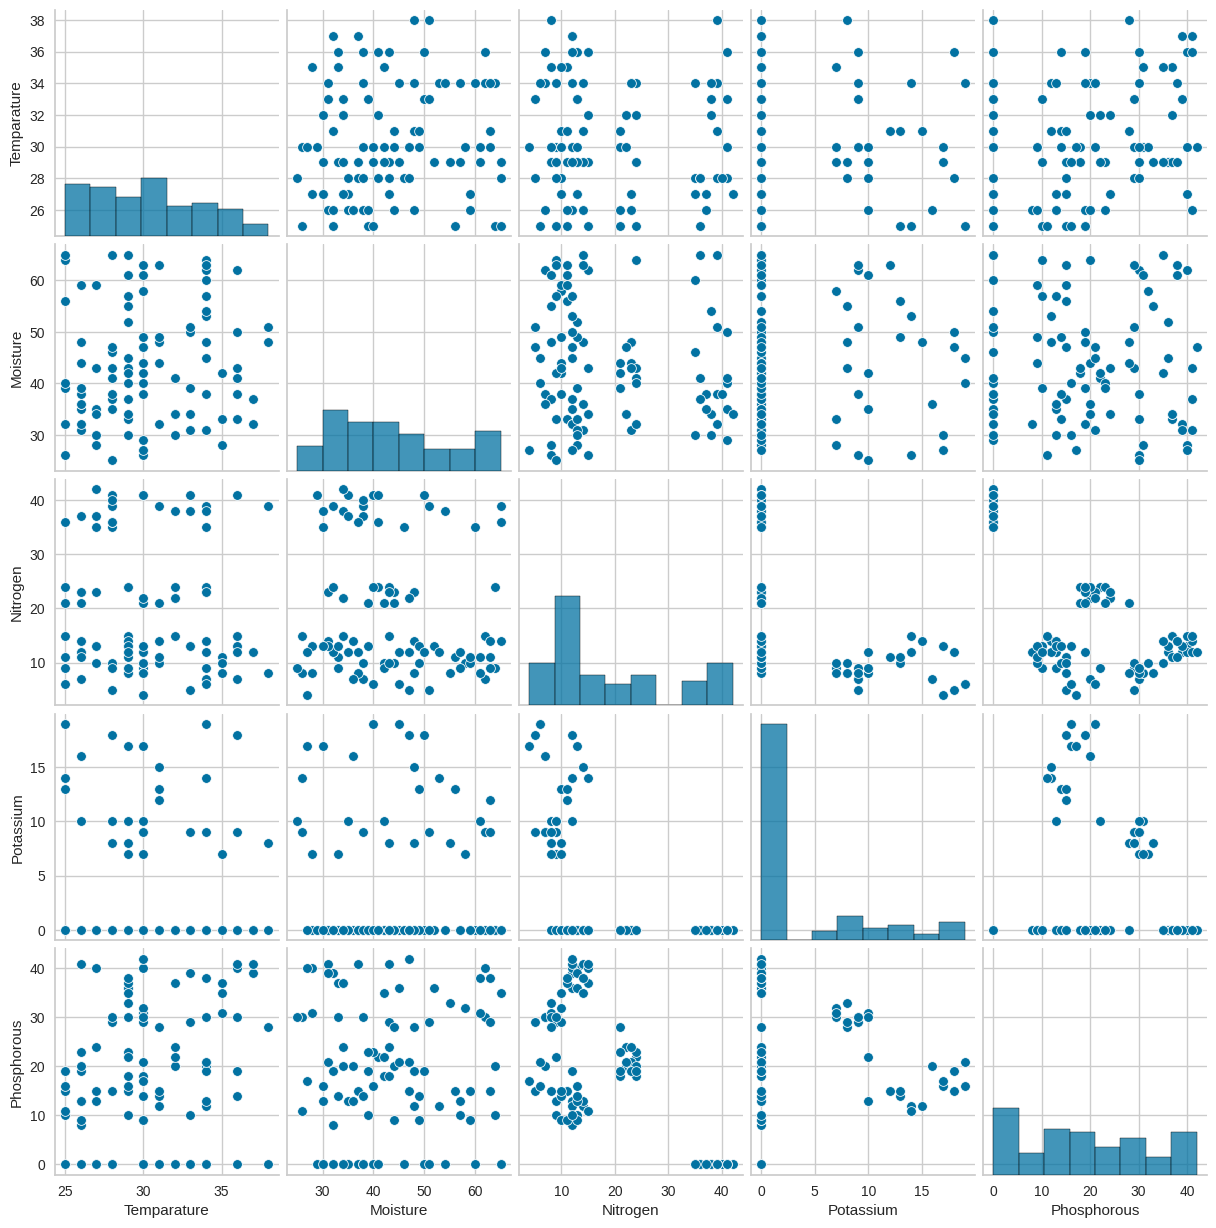

In [42]:
sns.pairplot(data = df, vars=['Temparature',	'Moisture','Nitrogen',	'Potassium',	'Phosphorous',])
plt.show()

# **Linear Discriminant Analysis**

**Splitting the Data and Building the Model**

In [45]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

**Predicting the Data**

In [48]:
# Prediction
y_pred = lda.predict(X_test)

**Accuracy Score:**

In [49]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("LDA for Classifcation model accuracy (in %):", acc*100)

LDA for Classifcation model accuracy (in %): 100.0


In [50]:
y_pred

array([4, 3, 0, 6, 5, 4, 6, 4, 5, 6, 5, 4, 4, 1, 5, 6, 5, 6, 0, 6, 1, 4,
       0, 2, 5, 1, 1, 6, 2, 5, 4, 4, 5])

In [51]:
yresult=pd.DataFrame(y_pred,columns=['Fertilizer Name'])

In [52]:
yresult

,Fertilizer Name
0,4
1,3
2,0
3,6
4,5
5,4
6,6
7,4
8,5
9,6


# **PICKLE FILE**

In [65]:
import pickle
pickle.dump(lda, open('ferti.pkl', 'wb'))

In [66]:
pickled_model = pickle.load(open('ferti.pkl', 'rb'))
pickle_pred =pickled_model.predict(X_test)

In [67]:
pickle_pred

array([4, 3, 0, 6, 5, 4, 6, 4, 5, 6, 5, 4, 4, 1, 5, 6, 5, 6, 0, 6, 1, 4,
       0, 2, 5, 1, 1, 6, 2, 5, 4, 4, 5])

In [68]:
acc = accuracy_score(y_test, pickle_pred)
print("pickle model accuracy (in %):", acc*100)

pickle model accuracy (in %): 100.0
